In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np


sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


REUSLTS_DIR = Path("/Users/marconzinir/Personal/tesi/git/MinkLoc3Dv2/results")

In [2]:
def load_standard_data(base_path: Path) -> pd.DataFrame:
    all_data = []
    standard_path = base_path / "standard"
    if not standard_path.is_dir():
        return pd.DataFrame()


    for run_dir in standard_path.iterdir():
        if run_dir.is_dir():
            run_name = run_dir.name
            metrics_file = run_dir / "metrics.csv"
            if metrics_file.is_file():
                df = pd.read_csv(metrics_file)
                df = df.replace({'"': '', ' ': ''}, regex=True)
                df = df.apply(pd.to_numeric, errors='coerce')
                df = df[~(df == 0).all(axis=1)]
                df['run_name'] = run_name
                all_data.append(df)

    if not all_data:
        return pd.DataFrame()
    return pd.concat(all_data, ignore_index=True)


def load_uncertainty_data(base_path: Path) -> pd.DataFrame:
    all_data = []
    uncertainty_path = base_path / "uncertainty"
    if not uncertainty_path.is_dir():
        return pd.DataFrame()

    for run_dir in uncertainty_path.iterdir():
        if run_dir.is_dir():
            run_name = run_dir.name
            for metrics_file in run_dir.glob("*.csv"):
                dataset_name = metrics_file.stem
                df = pd.read_csv(metrics_file)
                df = df.replace({'"': '', ' ': ''}, regex=True)
                df = df.apply(pd.to_numeric, errors='coerce')
                df = df[~(df == 0).all(axis=1)]
                df['run_name'] = run_name
                df['dataset'] = dataset_name
                all_data.append(df)

    if not all_data:
        return pd.DataFrame()
    return pd.concat(all_data, ignore_index=True)

df_standard = load_standard_data(REUSLTS_DIR)
df_uncertainty = load_uncertainty_data(REUSLTS_DIR)


display(df_standard.head())

display(df_uncertainty.head())

,Dataset,Avg top 1% Recall,Recall@1,Recall@2,Recall@3,Recall@4,Recall@5,Recall@6,Recall@7,Recall@8,...,Recall@17,Recall@18,Recall@19,Recall@20,Recall@21,Recall@22,Recall@23,Recall@24,Recall@25,run_name
0,NaN,96.544772,89.798143,94.118295,95.736851,96.584086,97.156414,97.560719,97.803232,98.018962,...,98.930106,98.984191,99.037689,99.085029,99.129476,99.165964,99.196057,99.228774,99.257198,v1_09
1,NaN,93.041958,82.410922,88.466533,91.496004,93.041958,93.814519,94.845155,95.425408,96.003996,...,97.937895,98.067766,98.196803,98.325008,98.389943,98.648019,98.648019,98.906094,98.971029,v1_09
2,NaN,87.099099,74.456757,83.136036,87.099099,89.243243,90.855856,92.266667,92.941441,93.476577,...,96.502703,96.570270,96.637838,96.704505,96.839640,96.906306,97.040541,97.107207,97.242342,v1_09
3,NaN,82.483658,74.164307,82.483658,86.265434,88.687323,90.123836,91.508949,92.617428,93.575535,...,96.826469,97.053366,97.304630,97.405517,97.632163,97.783302,97.934950,98.085707,98.211719,v1_09
4,NaN,96.345105,88.777564,93.602161,95.410196,96.387932,97.020564,97.485975,97.797075,98.025198,...,99.012224,99.046222,99.097866,99.145293,99.199145,99.233409,99.275665,99.311101,99.345009,v1_07


,% Kept,Avg top 1% Recall,Recall@1,Recall@2,Recall@3,Recall@4,Recall@5,Recall@6,Recall@7,Recall@8,...,Recall@19,Recall@20,Recall@21,Recall@22,Recall@23,Recall@24,Recall@25,run_name,dataset,"% Kept,""Avg top 1% Recall"",""Recall@1"",""Recall@2"",""Recall@3"",""Recall@4"",""Recall@5"",""Recall@6"",""Recall@7"",""Recall@8"",""Recall@9"",""Recall@10"",""Recall@11"",""Recall@12"",""Recall@13"",""Recall@14"",""Recall@15"",""Recall@16"",""Recall@17"",""Recall@18"",""Recall@19"",""Recall@20"",""Recall@21"",""Recall@22"",""Recall@23"",""Recall@24"",""Recall@25"""
0,100.0,87.099099,74.456757,83.136036,87.099099,89.243243,90.855856,92.266667,92.941441,93.476577,...,96.637838,96.704505,96.839640,96.906306,97.040541,97.107207,97.242342,v1_09,residential,NaN
1,90.0,86.797629,74.844162,83.162862,86.797629,88.939860,90.571773,91.980904,92.651449,93.168349,...,96.510097,96.510097,96.659350,96.659350,96.807507,96.881036,97.030290,v1_09,residential,NaN
2,80.0,86.083333,73.750000,82.083333,86.083333,88.416667,90.000000,91.166667,91.916667,92.500000,...,96.166667,96.166667,96.333333,96.333333,96.500000,96.583333,96.750000,v1_09,residential,NaN
3,70.0,85.974238,73.269231,82.158926,85.974238,88.252903,89.780479,90.829100,91.596517,92.164369,...,95.796444,95.796444,95.988752,95.988752,96.179245,96.273585,96.273585,v1_09,residential,NaN
4,60.0,86.000000,72.666667,82.222222,86.000000,88.444444,90.000000,91.111111,91.777778,92.333333,...,95.777778,95.777778,96.000000,96.000000,96.222222,96.333333,96.333333,v1_09,residential,NaN


In [ ]:
def plot_recall_curve(df: pd.DataFrame, run_name: str = None, dataset_name: str = None, y_lim: tuple = None):

    if run_name is not None:
        filter_col = 'run_name'
        filter_val = run_name
        hue_col = 'Dataset'  # Le linee nel grafico rappresentano i dataset
        #title = f"Recall Curve, run: {run_name}"
        legend_title = 'Dataset'
    elif dataset_name is not None:
        filter_col = 'Dataset'
        filter_val = dataset_name
        hue_col = 'run_name'  # Le linee nel grafico rappresentano le run
        # title = f"Recall@N, dataset: {dataset_name}"
        legend_title = 'Run Name'
    else:
        raise

    plot_data = df[df[filter_col] == filter_val]

    if plot_data.empty:
        return

    plt.figure(figsize=(12, 8))
    
    recall_cols = [f'Recall@{i}' for i in range(1, 26)]
    n_values = list(range(1, 26))

    for _, row in plot_data.iterrows():
        label = row[hue_col]
        recalls = row[recall_cols].values
        plt.plot(n_values, recalls, marker='o', linestyle='-', label=label)

    #plt.title(title)
    plt.xlabel('N')
    plt.ylabel('Recall (%)')
    plt.xticks(n_values)
    plt.grid(True, which='both', linestyle='--')
    plt.legend(title=legend_title)
    
    if y_lim and isinstance(y_lim, tuple) and len(y_lim) == 2:
        plt.ylim(y_lim)
    else:
        plt.ylim(0, 101)  # Default

    plt.savefig(f'recall_curve_{filter_val.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
plot_recall_curve(df_standard, run_name='v1_09')

In [ ]:
plot_recall_curve(df_standard, run_name='v1_09', y_lim=(70, 100))

In [ ]:
plot_recall_curve(df_standard, dataset_name='oxford')

In [ ]:
plot_recall_curve(df_standard, dataset_name='oxford', y_lim=(80, 100))

In [3]:
def plot_uncertainty_recall_trend(df: pd.DataFrame, metric_to_plot: str, run_name: str = None, dataset_name: str = None, ylim: tuple = (0, 100)):

    if df.empty or metric_to_plot not in df.columns or '% Kept' not in df.columns:
        print(f"DataFrame is empty or does not contain required columns: '{metric_to_plot}' or '% Kept'.")
        return

    if run_name is not None:
        filter_col = 'run_name'
        filter_val = run_name
        hue_col = 'dataset'  # Uniformato
        title = f"{metric_to_plot} vs % Kept (Run: {run_name})"
        legend_title = 'dataset'
    elif dataset_name is not None:
        filter_col = 'dataset'
        filter_val = dataset_name
        hue_col = 'run_name'  # Uniformato
        title = f"{metric_to_plot} vs % Kept (dataset: {dataset_name})"
        legend_title = 'Run Name'
    else:
        raise ValueError("Please provide either a run_name or a dataset_name to filter the data.")

    plot_data = df[df[filter_col] == filter_val]
    plot_data = plot_data.iloc[:-1]
    if plot_data.empty:
        print(f"No data found for {filter_col} = {filter_val}.")
        return

    plt.figure(figsize=(12, 8))

    for label, group in plot_data.groupby(hue_col):
        x_vals = group['% Kept']
        y_vals = group[metric_to_plot]
        plt.plot(x_vals, y_vals, marker='o', linestyle='-', label=label)

    plt.gca().invert_xaxis()
    plt.title(title)
    plt.xlabel('% Kept')
    plt.ylabel(metric_to_plot)
    plt.grid(True, which='both', linestyle='--')
    plt.legend(title=legend_title)

    plt.ylim(ylim)


    plt.savefig(f'{metric_to_plot.lower().replace(" ", "_")}_trend_{filter_val.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

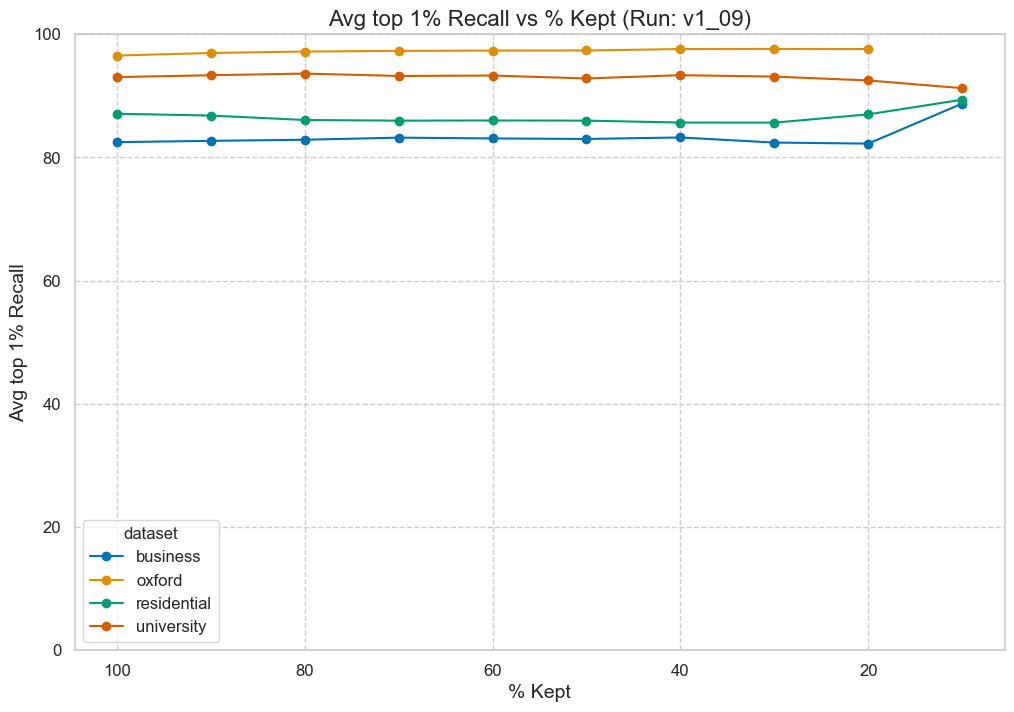

In [6]:
plot_uncertainty_recall_trend(
    df=df_uncertainty,
    metric_to_plot='Avg top 1% Recall',
    run_name="v1_09",
    )

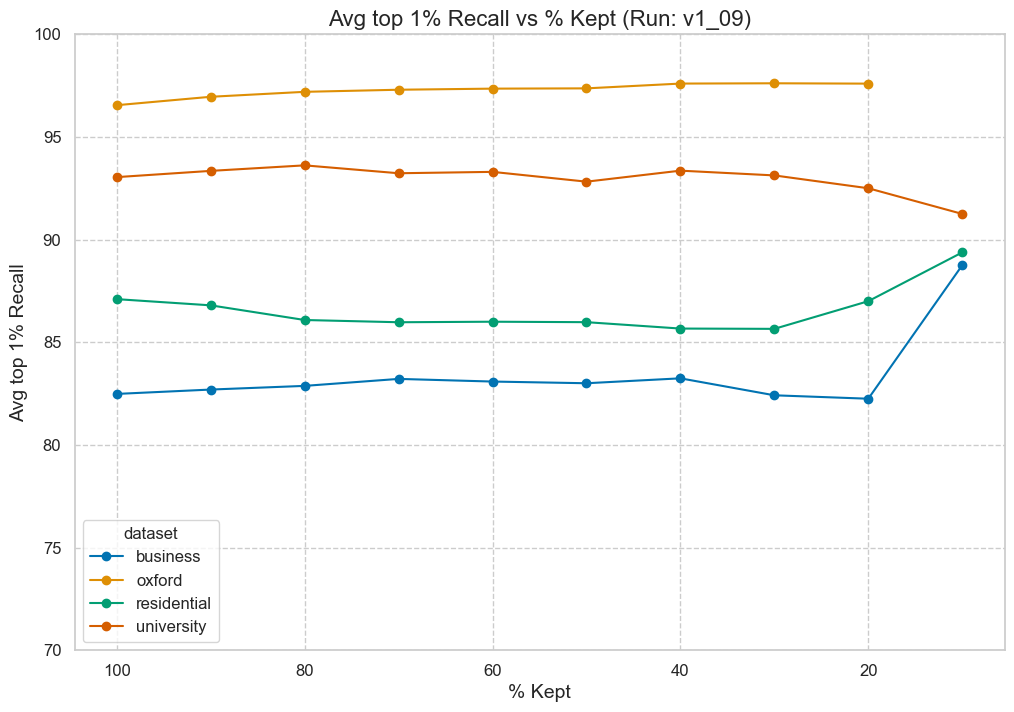

In [7]:
plot_uncertainty_recall_trend(
    df=df_uncertainty,
    metric_to_plot='Avg top 1% Recall',
    run_name="v1_09",
    ylim=(70, 100)
    )